step　decayとかと比べても特に良くない

In [1]:
import os
os.getcwd()

'/home/matsui-k/projects/d-rcn/results/blind/param_search_1002'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cPickle
import gzip
import scipy.io as sio

In [7]:
os.listdir(os.getcwd())

['beta0.5',
 'alpha0.0002',
 'both',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'visualize_hist_train_test.ipynb']

In [10]:
pred_list = []
for path in ['beta0.5',
 'alpha0.0002',
 'both']:
    ms = sio.loadmat(path+'/pred2.mat')
    pred_list.append(ms['pred'])


(855000, 10)
(855000, 10)
(855000, 10)


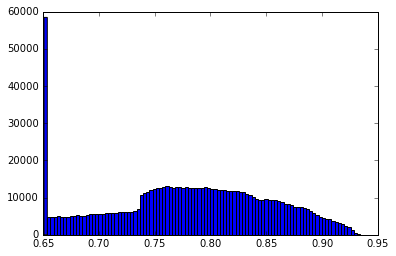

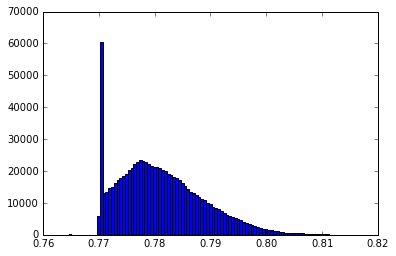

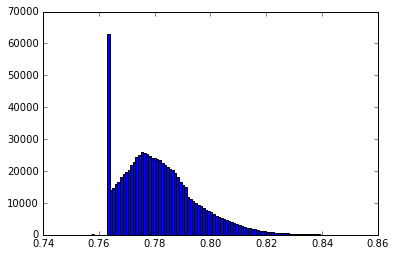

In [11]:
for pred in pred_list:
    print pred.shape
    plt.figure()
    st = plt.hist(np.linalg.norm(pred, axis=1), bins=100)

(855000, 10)
(855000, 10)
(855000, 10)


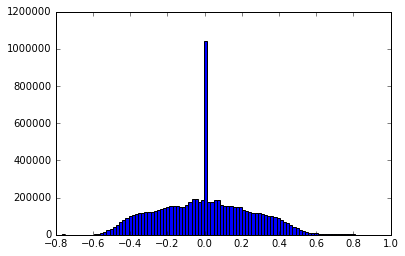

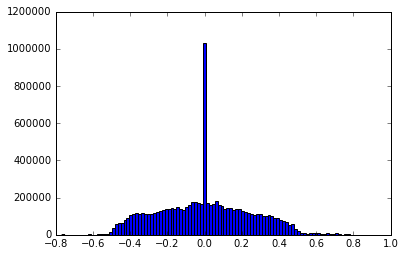

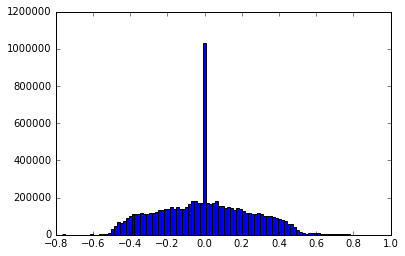

In [12]:
for pred in pred_list:
    print pred.shape
    plt.figure()
    st = plt.hist(pred.flatten(), bins=100)

In [13]:
summary_list = []
for path in ['beta0.5',
 'alpha0.0002',
 'both']:
    with gzip.open(path+'/summary2.pkl.gz', 'rb') as f:
        summary_list.append(cPickle.load(f))


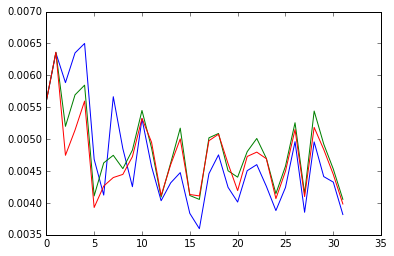

In [16]:
for summary in summary_list:
    plt.plot(dict(summary)['training_error_array'])


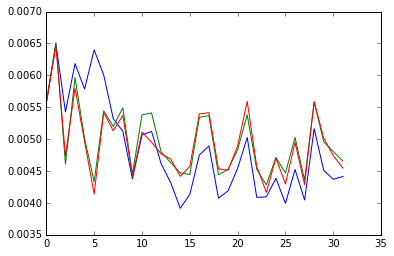

In [17]:
for summary in summary_list:
    plt.plot(dict(summary)['test_error_array'])


In [11]:
dict(summary_list[3])

{'N': 80000,
 'batch_size': 1000,
 'compile_time': 23279.128024999998,
 'func_key_list': ['relu', '0.5*sigmoid+0.5'],
 'lr_decay': 0.95,
 'n_hidden_tensors': 100,
 'test_error_array': array([ 0.03377939,  0.01488622,  0.01325006,  0.0131814 ,  0.01361751,
         0.01251894,  0.01339906,  0.01256829,  0.01270697,  0.01300071,
         0.0130916 ,  0.01316098,  0.01185846,  0.01160861,  0.01161219,
         0.01153148,  0.01185289,  0.01149135,  0.01091645,  0.01112849,
         0.0115682 ,  0.01125076,  0.01145314,  0.01110663,  0.01131   ,
         0.01104987,  0.01145363,  0.01116373,  0.01131371,  0.01130316,
         0.01095081,  0.0112713 ]),
 'train_time': 102543.68947699999,
 'training_error_array': array([ 0.03344205,  0.01510602,  0.01370235,  0.01322291,  0.01323085,
         0.01235167,  0.01263847,  0.01226529,  0.01293504,  0.01264734,
         0.01265633,  0.01297932,  0.0119868 ,  0.01163205,  0.01172116,
         0.01140304,  0.01108486,  0.01137023,  0.01105135,  0.01

In [30]:
def a(lr_decay, n):
    tmp = 1.
    for _ in range(n):
        yield tmp
        tmp = tmp*lr_decay
        

In [37]:
gen = a(0.95, 10)

In [34]:
gen.next()

0.9025

In [38]:
np.array(gen)

array(<generator object a at 0x7fb5f8a4dd70>, dtype=object)

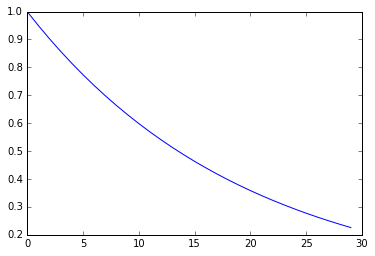

In [40]:
plt.plot(list(a(0.95, 30)))